Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

Importing Dataset

In [2]:
data = pd.read_csv('/content/Loan_Prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Column Names


In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Information of the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Size of the Dataset

In [9]:
data.shape

(614, 13)

Data Description

In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Checking For Null Values

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing Null Values with Mode and Median

In [7]:
data["Gender"].fillna(data['Gender'].mode()[0],inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)
data["Married"].fillna(data['Married'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace = True)

Verifying

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Boxplot Analysis

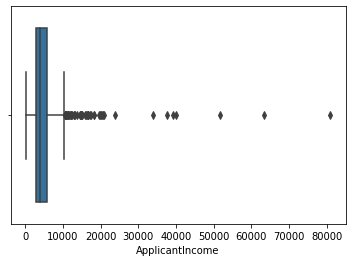

In [11]:
sns.boxplot(x=data.ApplicantIncome)

In [12]:
Q1 = data.ApplicantIncome.quantile(0.25)
Q2 = data.ApplicantIncome.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit =',upper_limit)
print('lower_limit =',lower_limit)

2917.5
upper_limit = 10171.25
lower_limit = -1498.75


In [13]:
data['ApplicantIncome'] = np.where(data['ApplicantIncome']>upper_limit,data['ApplicantIncome'].median(),data['ApplicantIncome'])

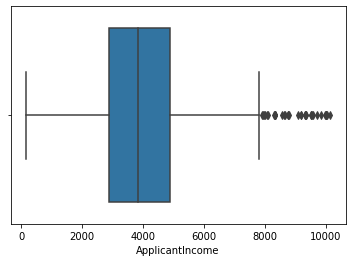

In [14]:
sns.boxplot(x=data.ApplicantIncome)

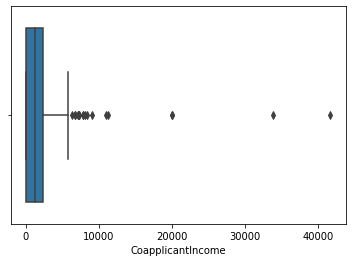

In [16]:
sns.boxplot(x=data.CoapplicantIncome)

In [19]:
Q1 = data.CoapplicantIncome.quantile(0.25)
Q2 = data.CoapplicantIncome.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
print('lower_limit =',lower_limit)

2297.25
upper_limit= 5743.125
lower_limit = -3445.875


In [20]:
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome']>upper_limit,data['CoapplicantIncome'].median(),data['CoapplicantIncome'])

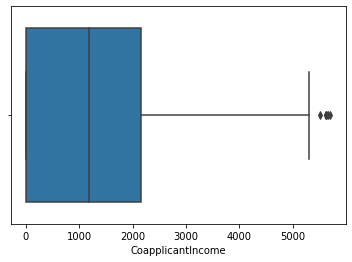

In [21]:
sns.boxplot(x=data.CoapplicantIncome)

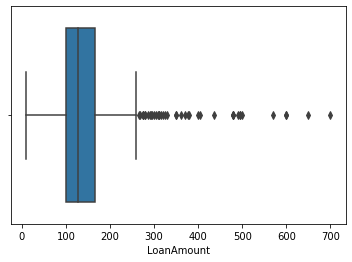

In [22]:
sns.boxplot(x=data.LoanAmount)

In [23]:
Q1 = data.LoanAmount.quantile(0.25)
Q2 = data.LoanAmount.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit =',upper_limit)
print('lower_limit =',lower_limit)

64.5
upper_limit = 261.5
lower_limit = 3.5


In [24]:
data['LoanAmount'] = np.where(data['LoanAmount']>upper_limit,data['LoanAmount'].median(),data['LoanAmount'])

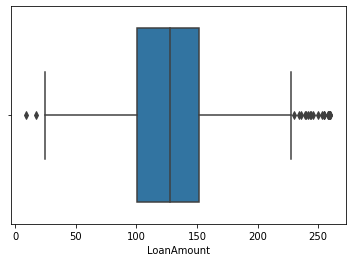

In [25]:
sns.boxplot(x=data.LoanAmount)

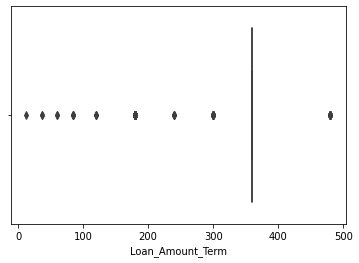

In [26]:
sns.boxplot(x=data.Loan_Amount_Term)

In [27]:
Q1 = data.Loan_Amount_Term.quantile(0.25)
Q2 = data.Loan_Amount_Term.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
print('lower_limit =',lower_limit)

0.0
upper_limit= 360.0
lower_limit = 360.0


In [29]:
data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term']>upper_limit,data['Loan_Amount_Term'].median(),data['Loan_Amount_Term'])

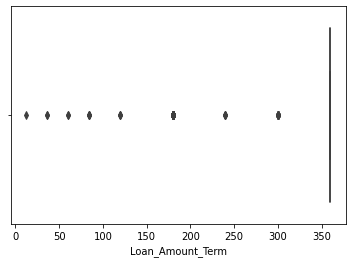

In [31]:
sns.boxplot(x=data.Loan_Amount_Term)

Handling Categorical Values - Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data.Married = le.fit_transform(data.Married)
data.Education = le.fit_transform(data.Education)
data.Self_Employed = le.fit_transform(data.Self_Employed)
data.Property_Area = le.fit_transform(data.Property_Area)
data.Loan_Status = le.fit_transform(data.Loan_Status)

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [34]:
data=data.drop(columns=['Loan_ID'],axis=1)

In [35]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [36]:
data=data.replace('3+',3,)
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [37]:
y=data.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [39]:
X=data.drop(columns=['Loan_Status'],axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2


Scaling The Data

In [40]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(X), columns=X.columns)
X_Scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.947218,-0.893781,-0.010078,0.338246,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.261857,0.154146,-0.010078,0.338246,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.595116,-0.893781,-1.395146,0.338246,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.820863,0.744821,-0.188797,0.338246,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,1.028964,-0.893781,0.280339,0.338246,0.411733,1.223298


Splitting Data Into Train And Test

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_Scaled,y, test_size=0.33,random_state=42)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(411, 11) (203, 11) (411,) (203,)


In [43]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,0.472343,0.728816,-0.737806,-0.528362,-0.392601,2.697976,-0.893781,2.223902,0.338246,0.411733,-0.047607
377,0.472343,0.728816,-0.737806,-0.528362,-0.392601,0.114066,-0.893781,0.034601,0.338246,0.411733,-0.047607
163,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.036651,0.111756,0.660116,0.338246,0.411733,-1.318513
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.649252,-0.893781,-1.283447,0.338246,0.411733,-1.318513
132,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,-0.747779,-0.893781,-1.305787,0.338246,0.411733,-0.047607


In [44]:
y_train.head()

244    1
393    1
310    1
408    0
572    1
Name: Loan_Status, dtype: int64

In [45]:
y_test.head()

350    1
377    1
163    1
609    1
132    1
Name: Loan_Status, dtype: int64